In [232]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [0]:
plik = 'gdrive/My Drive/Colab Notebooks/mobile-price-classification_train.csv'
dane = pd.read_csv(plik)

In [0]:
dane.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [0]:
zmienna_celu = dane.price_range
target = zmienna_celu.name
f = pd.DataFrame(zmienna_celu.value_counts())
display(f)

,price_range
3,500
2,500
1,500
0,500


In [0]:
def Poziomy(dataset):
  n_unikalnych = 5
  kolumny = dataset.columns
  nazwa = pd.Series()
  typ = pd.Series()
  licznosc = pd.Series()
  poziom = pd.Series()

  for element in kolumny:
    kols = pd.Series(element)
    nazwa = nazwa.append(kols)
    dt = dataset[element].dtype
    dts = pd.Series(str(dt))
    typ = typ.append(dts)
    uni = dataset[element].nunique()
    unis = pd.Series(int(uni))
    licznosc = licznosc.append(unis)
    if (dt==np.int64 or dt==np.float64) and int(uni)>n_unikalnych:
      poz = 'num'
    else:
      poz = 'dyskret'
    pozs = pd.Series(poz)
    poziom = poziom.append(pozs)
    
  tabelka = pd.DataFrame({'Nazwa':nazwa, 'Typ':typ, 'Unikalne': licznosc, 'Poziom': poziom})
  tabelka.reset_index(inplace=True, drop=True)
  return tabelka

f = Poziomy(dane)
display(f)

,Nazwa,Typ,Unikalne,Poziom
0,battery_power,int64,1094,num
1,blue,int64,2,dyskret
2,clock_speed,float64,26,num
3,dual_sim,int64,2,dyskret
4,fc,int64,20,num
5,four_g,int64,2,dyskret
6,int_memory,int64,63,num
7,m_dep,float64,10,num
8,mobile_wt,int64,121,num
9,n_cores,int64,8,num


In [0]:
poziomy = Poziomy(dane)
kategorie = poziomy.query("Nazwa not in ('"+target+"') and Poziom == 'dyskret'")
numeryczne = poziomy.query("Nazwa not in ('"+target+"') and Poziom == 'num'")
f = pd.concat([kategorie, numeryczne])
display(f)

,Nazwa,Typ,Unikalne,Poziom
1,blue,int64,2,dyskret
3,dual_sim,int64,2,dyskret
5,four_g,int64,2,dyskret
17,three_g,int64,2,dyskret
18,touch_screen,int64,2,dyskret
19,wifi,int64,2,dyskret
0,battery_power,int64,1094,num
2,clock_speed,float64,26,num
4,fc,int64,20,num
6,int_memory,int64,63,num


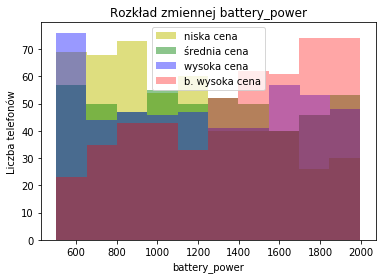

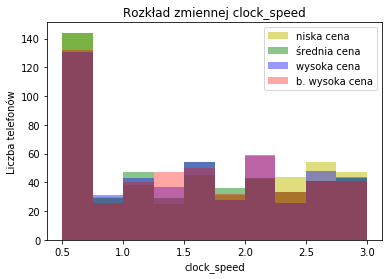

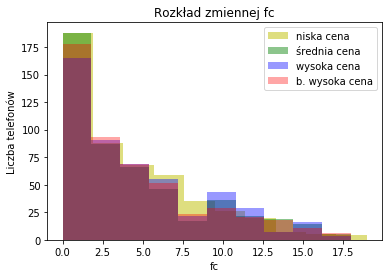

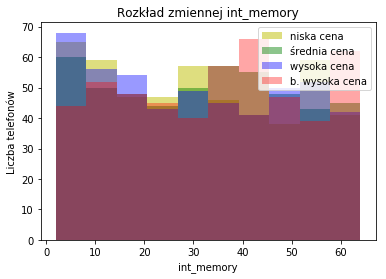

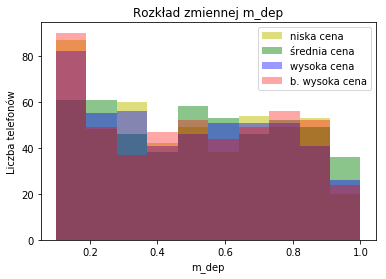

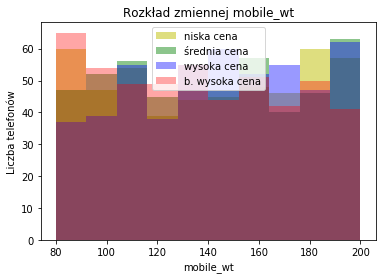

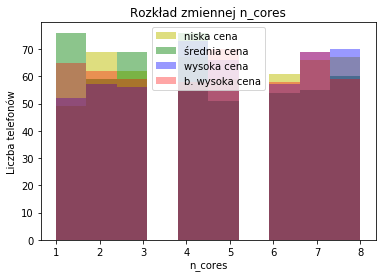

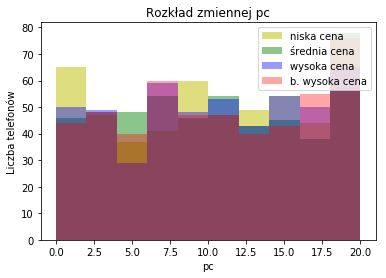

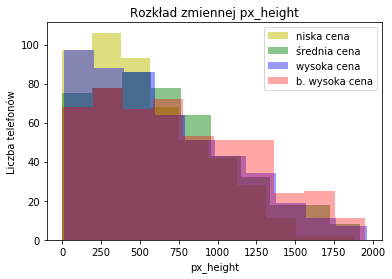

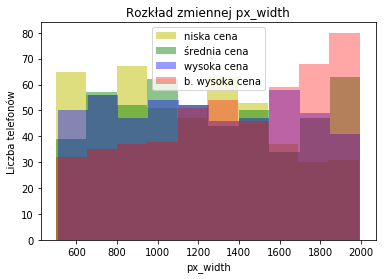

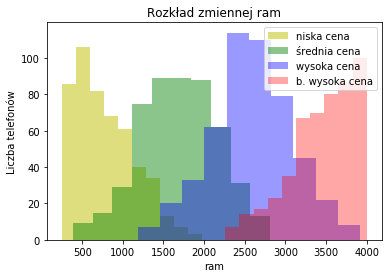

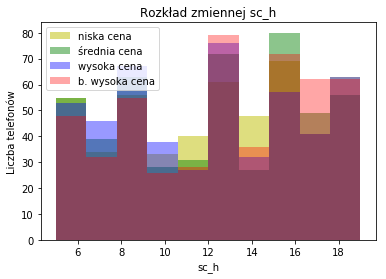

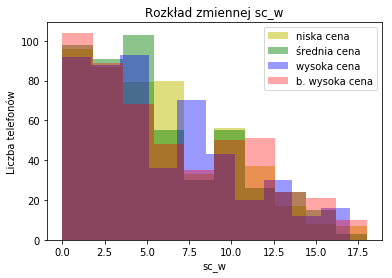

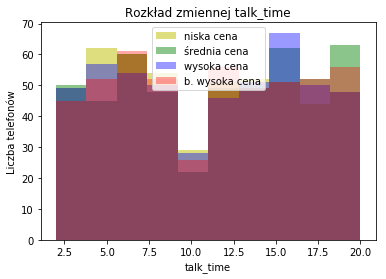

In [0]:
nazwy = numeryczne.Nazwa.values.tolist()

for c in nazwy:
  x0 = dane.loc[dane[target]==0, c]
  x1 = dane.loc[dane[target]==1, c]
  x2 = dane.loc[dane[target]==2, c]
  x3 = dane.loc[dane[target]==3, c]

  plt.hist(x0, alpha=0.50, color='y', label='niska cena')
  plt.hist(x1, alpha=0.45, color='g', label='średnia cena')
  plt.hist(x2, alpha=0.40, color='b', label='wysoka cena')
  plt.hist(x3, alpha=0.35, color='r', label='b. wysoka cena')
  plt.gca().set(title='Rozkład zmiennej '+c, ylabel='Liczba telefonów', xlabel=c)
  plt.legend()
  plt.show();

In [0]:
dane_kategorie = dane.copy()

nazwy = kategorie.Nazwa.values.tolist()
slownik = {0: 'nie', 1: 'tak'}

for element in nazwy:
    zm = 'x_'+element
    dane_kategorie[zm] = dane[element].map(slownik) 
    del dane_kategorie[element]
    
    
slownik2 = {0: 'niska cena', 1: 'średnia cena', 2: 'wysoka cena', 3: 'b. wysoka cena'}
dane_kategorie['price_range'] = dane_kategorie['price_range'].map(slownik2)

dane_kategorie.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,x_blue,x_dual_sim,x_four_g,x_three_g,x_touch_screen,x_wifi
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,średnia cena,nie,nie,nie,nie,nie,tak
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,wysoka cena,tak,tak,tak,tak,tak,nie
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,wysoka cena,tak,tak,tak,tak,tak,nie
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,wysoka cena,tak,nie,nie,tak,nie,nie
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,średnia cena,tak,nie,tak,tak,tak,nie


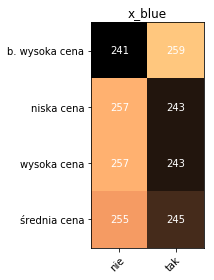

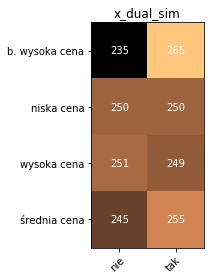

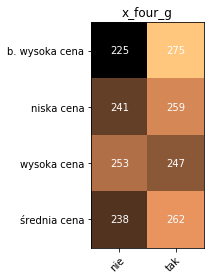

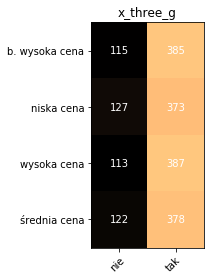

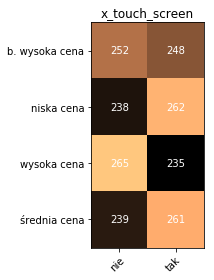

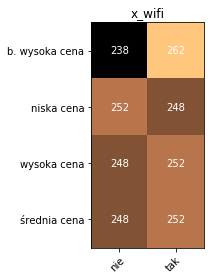

In [0]:
poziomy = Poziomy(dane_kategorie)
kategorie = poziomy.query("Nazwa not in ('"+target+"') and Poziom == 'dyskret'")
nazwy = kategorie.Nazwa.values.tolist()

for element in nazwy:
  y = dane_kategorie[target]
  x = dane_kategorie[element]
  tab = pd.crosstab(y, x)
  num = tab.values

  fig, ax = plt.subplots()
  im = ax.imshow(num, cmap='copper')

  tx = tab.columns.get_values()
  ty = tab.index.get_values()
  ax.set_xticks(np.arange(len(tx)))
  ax.set_yticks(np.arange(len(ty)))
  ax.set_xticklabels(tx)
  ax.set_yticklabels(ty)

  plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

  for i in range(len(ty)):
      for j in range(len(tx)):
          text = ax.text(j, i, num[i, j], ha="center", va="center", color="w")
        
  ax.set_title(x.name)
  fig.tight_layout()
  plt.show();

In [0]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def Czy_zaleznosc(v1, v2):
  c = pd.crosstab(v1, v2)
  t = c.values
  stat, p, dof, expected = chi2_contingency(t)
  # print('dof=%d' % dof)
  # print(t)
  # print(expected)
  alpha = 0.05
  # print('significance=%.3f, p=%.3f' % (alpha, p))
  if p <= alpha:
	   return True, p
  else:
	   return False, p

In [0]:
poziomy = Poziomy(dane_kategorie)
kategorie = poziomy.query("Nazwa not in ('"+target+"') and Poziom == 'dyskret'")
zmienna_celu_kat = dane_kategorie.price_range
nazwy = kategorie.Nazwa.values.tolist()

nazwa = pd.Series()
zaleznosc = pd.Series()
pv = pd.Series()

for element in nazwy:
  kols = pd.Series(element)
  nazwa = nazwa.append(kols)
  zm = dane_kategorie[element]
  z, p = Czy_zaleznosc(zm,zmienna_celu_kat)
  zs = pd.Series(z)
  zaleznosc = zaleznosc.append(zs)
  ps = pd.Series(p)
  pv = pv.append(ps)

pz = pd.DataFrame({'Nazwa':nazwa, 'Zaleznosc':zaleznosc, 'p_value':pv})
slownik = {False: 'Nie', True: 'Tak'}
pz.Zaleznosc = pz.Zaleznosc.map(slownik)

display(pz)

# Na podstawie "dużych" (alpha>0.05) wartość p-value stwierdzam brak zależności miedzy zmiennymi objaśniającymi a zmienną celu 

,Nazwa,Zaleznosc,p_value
0,x_blue,Nie,0.698018
0,x_dual_sim,Nie,0.732350
0,x_four_g,Nie,0.364714
0,x_three_g,Nie,0.711696
0,x_touch_screen,Nie,0.274701
0,x_wifi,Nie,0.835991


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

poziomy = Poziomy(dane)
numeryczne = poziomy.query("Nazwa not in ('"+target+"') and Poziom == 'num'")

nazwy = numeryczne.Nazwa.values.tolist()

X = dane[nazwy]
# display(pd.DataFrame(X).head())
X_scaled = preprocessing.scale(X)
# display(pd.DataFrame(X_scaled).head())
y = dane[target].values
# display(pd.DataFrame(y).head())

regresja = LinearRegression()  
regresja.fit(X_scaled, y)

r_sq = regresja.score(X_scaled, y)
print('coefficient of determination:', round(r_sq,2))

i = regresja.intercept_
w = [['intercept', i]]
d = pd.DataFrame(w, columns = ['index', 'Współczynniki']) 
d.set_index('index', drop=True, inplace=True)

coeff_df = pd.DataFrame(regresja.coef_, nazwy, columns=['Współczynniki']) 

f = pd.concat([d, coeff_df])
display(f)

coefficient of determination: 0.92


,Współczynniki
intercept,1.500000
battery_power,0.224567
clock_speed,-0.010152
fc,0.004219
int_memory,0.015757
m_dep,-0.002458
mobile_wt,-0.030960
n_cores,0.004334
pc,0.000813
px_height,0.121997


In [0]:
import statsmodels.api as sm

X_scaled2 = pd.DataFrame(X_scaled)
X_scaled2.columns = nazwy
X_scaled2 = sm.add_constant(X_scaled2);

model = sm.OLS(y,X_scaled2).fit()

f=pd.DataFrame(round(model.pvalues, 6), columns=['p-value'])
f = f.loc[f['p-value'] < 0.05]
display(f)

# Na podstawie "niskich" (alpha<0.05) wartość p-value stwierdzam, że zmienne: battery_power, int_memory, mobile_wt, px_height, px_width i ram mają wpływ na cenę telefonu

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,p-value
const,0.000000
battery_power,0.000000
int_memory,0.028620
mobile_wt,0.000017
px_height,0.000000
px_width,0.000000
ram,0.000000


In [0]:
y_pred = regresja.predict(X_scaled)
target2 = target+'_pred'
porownanie = pd.DataFrame({target: y.flatten(), target2: y_pred.flatten()})
porownanie[target2]=porownanie[target2].apply(lambda x: 0 if x <= 0 else x)
porownanie[target2]=porownanie[target2].apply(lambda x: 3 if x >= 3 else x)
porownanie[target2]=porownanie[target2].round(0) 
porownanie[target2]=porownanie[target2].astype(int)

slownik = {0: 'niska cena', 1: 'średnia cena', 2: 'wysoka cena', 3: 'b. wysoka cena'}
porownanie[target] = porownanie[target].map(slownik)
porownanie[target2] = porownanie[target2].map(slownik)

c = pd.crosstab(porownanie[target], porownanie[target2])
display(c)

price_range_pred,b. wysoka cena,niska cena,wysoka cena,średnia cena
price_range,,,,
b. wysoka cena,422,0,78,0
niska cena,0,446,0,54
wysoka cena,1,0,474,25
średnia cena,0,1,9,490
